## **Task 1 : Exploratory Data Analysis (EDA) [3 marks]**

### Preprocessing

From CombineScript.py

In [101]:
# Library imports
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import os 

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "./UCI HAR Dataset/train"
test_path = "./UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING',
}

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Combining Traing Data
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path, "Inertial Signals", "total_acc_x_train.txt"), sep='\\s+',
                          header=None)
total_acc_y = pd.read_csv(os.path.join(train_path, "Inertial Signals", "total_acc_y_train.txt"), sep='\\s+',
                          header=None)
total_acc_z = pd.read_csv(os.path.join(train_path, "Inertial Signals", "total_acc_z_train.txt"), sep='\\s+',
                          header=None)

# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path, "subject_train.txt"), sep='\\s+', header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path, "y_train.txt"), sep='\\s+', header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where(subject_train.iloc[:, 0] == subject)[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined", "Train", ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined", "Train", ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:, 0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx, total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy, total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz, total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx': accx, 'accy': accy, 'accz': accz})
        save_path = os.path.join("Combined", "Train", ACTIVITIES[label], f"Subject_{subject}.csv")
        data.to_csv(save_path, index=False)

print("Done Combining the training data")

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Combining Test Data
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path, "Inertial Signals", "total_acc_x_test.txt"), sep='\\s+',
                          header=None)
total_acc_y = pd.read_csv(os.path.join(test_path, "Inertial Signals", "total_acc_y_test.txt"), sep='\\s+',
                          header=None)
total_acc_z = pd.read_csv(os.path.join(test_path, "Inertial Signals", "total_acc_z_test.txt"), sep='\\s+',
                          header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path, "subject_test.txt"), sep='\\s+', header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path, "y_test.txt"), sep='\\s+', header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):

    sub_idxs = np.where(subject_test.iloc[:, 0] == subject)[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        if not os.path.exists(os.path.join("Combined", "Test", ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined", "Test", ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:, 0] == label].index

        accx = []
        accy = []
        accz = []
        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx, total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy, total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz, total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx': accx, 'accy': accy, 'accz': accz})
        save_path = os.path.join("Combined", "Test", ACTIVITIES[label], f"Subject_{subject}.csv")
        data.to_csv(save_path, index=False)

print("Done Combining the testing data")
print("Done Combining the data")

# Creation of raw dataset

x = pd.read_csv(os.path.join(train_path,"X_train.txt"), sep='\\s+', header=None)
featurel = pd.read_csv(os.path.join("./UCI HAR Dataset","features.txt"), sep='\\s+', header=None)
featurelist = list(featurel.loc[:,1])
x.columns = featurelist
yg = pd.read_csv(os.path.join(train_path,"y_train.txt"), sep='\\s+', header=None)
xtest = pd.read_csv(os.path.join(test_path,"X_test.txt"), sep='\\s+', header=None)
xtest.columns = featurelist
ytest = pd.read_csv(os.path.join(test_path,"y_test.txt"), sep='\\s+', header=None)

# -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Done Combining the training data
Done Combining the testing data
Done Combining the data


From MakeDataset.py

In [102]:
# Library imports
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# plt.style.use('dark_background') # for dark background of plts

# Constants
time = 10
offset = 100
folders = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2, "WALKING_DOWNSTAIRS": 3, "SITTING": 4, "STANDING": 5, "LAYING": 6}

combined_dir = os.path.join("Combined")

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Train Dataset
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train = []
y_train = []
dataset_dir = os.path.join(combined_dir, "Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir, folder))

    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir, folder, file), sep=",", header=0)
        df = df[offset:offset + time * 50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Test Dataset
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test = []
y_test = []
dataset_dir = os.path.join(combined_dir, "Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir, folder))
    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir, folder, file), sep=",", header=0)
        df = df[offset:offset + time * 50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Final Dataset
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


Importing Libraries

In [103]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import tsfel
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Questions

### 1. Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? [0.5 marks]

In [5]:
activity = ["LAYING" , "SITTING","STANDING","WALKING", "WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
dir_path = os.path.join("Combined", "train")
t = 10
freq = 50

Loading Data

In [6]:
activity_sample = []
for action in activity:
    path = os.path.join(dir_path, action)
    files = os.listdir(path)
    sel_file = os.path.join(path, files[-1])

    df = pd.read_csv(sel_file)

    df_first_500 = df[:t*freq]

    activity_sample.append(df_first_500.values)

activity_sample = np.array(activity_sample)

Plotting Data

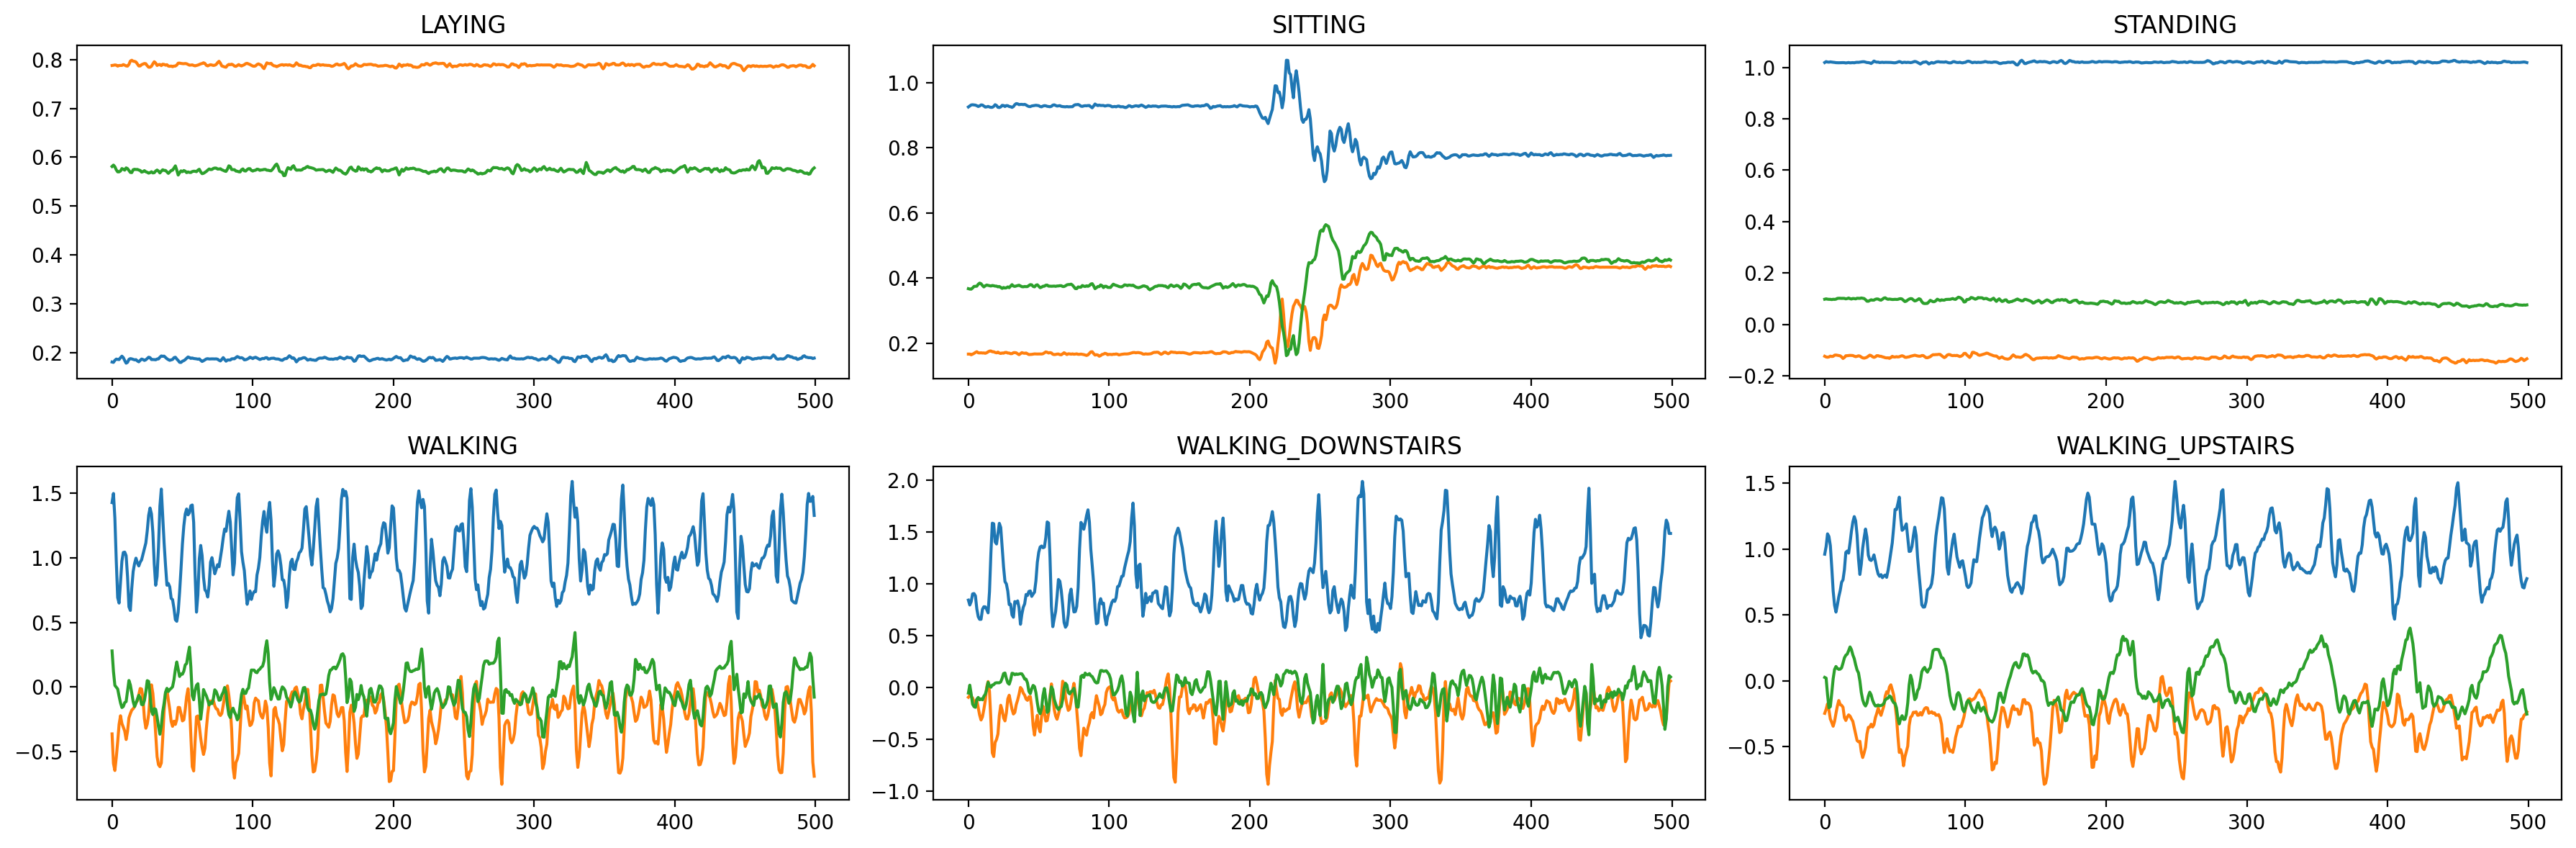

In [7]:
plt.figure(figsize=(18,6))
for i, sample in enumerate(activity_sample):
    plt.subplot(2, 3, i+1)
    plt.plot(sample)
    plt.title(activity[i])

plt.tight_layout()
plt.show()

#### The waveforms show noticeable differences between the activities. Sitting has a distinct pattern, laying and standing look similar with nearly flat signals, while walking, walking upstairs and walking downstairs show repeating oscillations that resemble each other. With the help of feature engineering or dimensionality reduction, the model should be able to classify the activities from the data.

### 2. Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration for each activity and justify your answer. [0.5 marks]

Activity Labels

In [8]:
activity = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
dir_path = os.path.join("Combined", "train")
t = 10
freq = 50

Computing Acceleration

In [9]:
linear_acc_all = []
for action in activity:
    path = os.path.join(dir_path, action)
    files = os.listdir(path)
    sel_file = os.path.join(path, files[1])

    df = pd.read_csv(sel_file)

    df_first_500 = df[:t*freq]

    # print(df_first_500.columns) Just to check the column names

    acc_in_x = df_first_500['accx'].values
    acc_in_y = df_first_500['accy'].values
    acc_in_z = df_first_500['accz'].values

    acceleration = np.vstack((acc_in_x**2, acc_in_y**2, acc_in_z**2)).T
    liner_acceleration = np.sum(acceleration, axis=1)
    linear_acc_all.append(liner_acceleration)

linear_acc = np.array(linear_acc_all)

Plotting Linear Acceleration

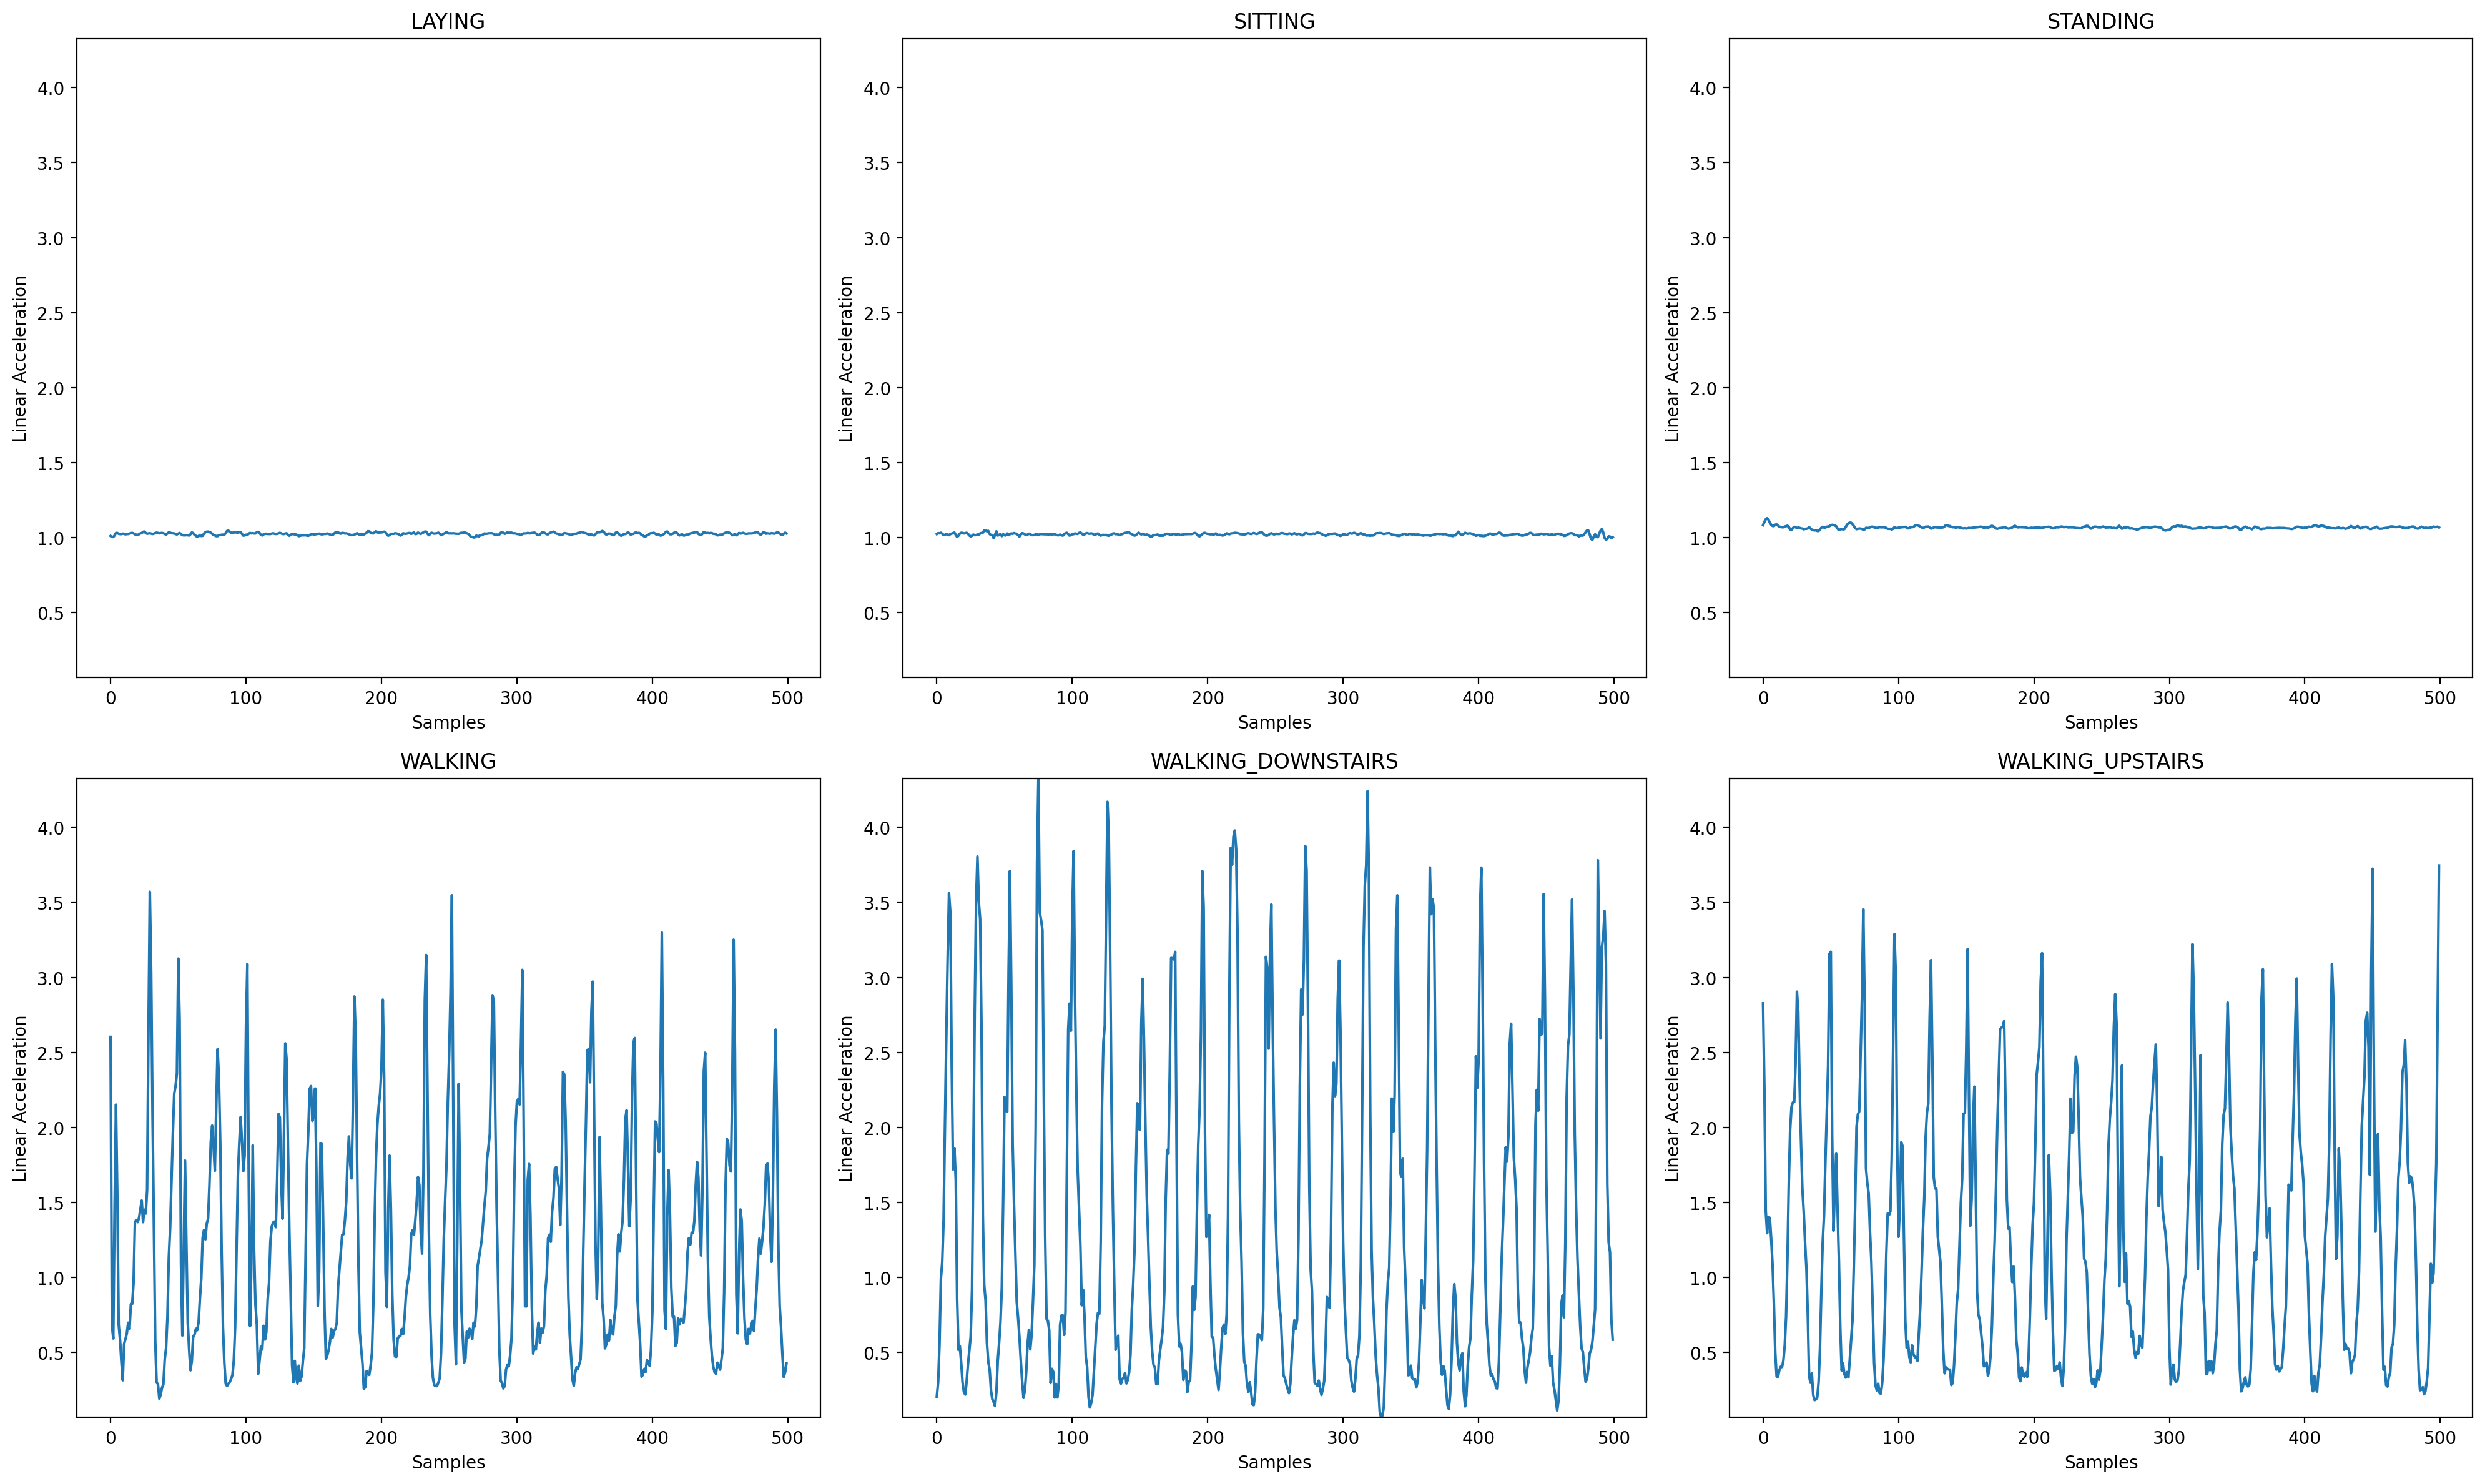

In [10]:
ymin = np.min(linear_acc_all)
ymax = np.max(linear_acc_all)

plt.figure(figsize=(20, 12))
for i in range(len(activity)):
    plt.subplot(2, 3, i+1)
    plt.plot(linear_acc[i])
    plt.title(activity[i])
    plt.xlabel('Samples')
    plt.ylabel('Linear Acceleration')
    plt.ylim(ymin, ymax)

plt.tight_layout()
plt.show()

Comparision using Mean and Standard Deviation

In [11]:
static_activities = ['LAYING', 'SITTING', 'STANDING']
dynamic_activities = ['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

static_acc_avg = [np.mean(linear_acc[i]) for i in range(3)]
dynamic_acc_avg = [np.mean(linear_acc[i+3]) for i in range(3)]

print("Mean Linear Acceleration for Static Activities:", static_acc_avg)
print("Mean Linear Acceleration for Dynamic Activities:", dynamic_acc_avg)

static_acc_std = [np.std(linear_acc[i]) for i in range(3)]
dynamic_acc_std = [np.std(linear_acc[i+3]) for i in range(3)]

print("Standard Deviation of Linear Acczeleration for Static Activities:", static_acc_std)
print("Standard Deviation of Linear Acceleration for Dynamic Activities:", dynamic_acc_std)

Mean Linear Acceleration for Static Activities: [np.float64(1.0244617425960356), np.float64(1.0205906553392927), np.float64(1.0665279544926758)]
Mean Linear Acceleration for Dynamic Activities: [np.float64(1.214781460313424), np.float64(1.3096136841779782), np.float64(1.2504127032798875)]
Standard Deviation of Linear Acczeleration for Static Activities: [np.float64(0.007457757533815072), np.float64(0.007812692503902645), np.float64(0.00868667321240001)]
Standard Deviation of Linear Acceleration for Dynamic Activities: [np.float64(0.7299440014749482), np.float64(1.110448694716241), np.float64(0.8221198417580775)]


#### No, we donot need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs). As we can see the standard deviation for the dynamic activities is much higher than that for static activities. So, we can set a threshold of around 0.05 and distinguish between dynamic and static activities.

### 3. Visualize the data using PCA. [1 marks]

In [12]:
# Conversion of data to appropriate format to apply PCA.
df = pd.DataFrame(np.concatenate((X_train.reshape((-1, 3)), np.repeat(y_train, 500).reshape(-1,1)), axis = 1), columns = ["accx", "accy", "accz", "Label"])
print(df.shape)


(63000, 4)


- Use PCA (Principal Component Analysis) on Total Acceleration to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.

(126, 2)


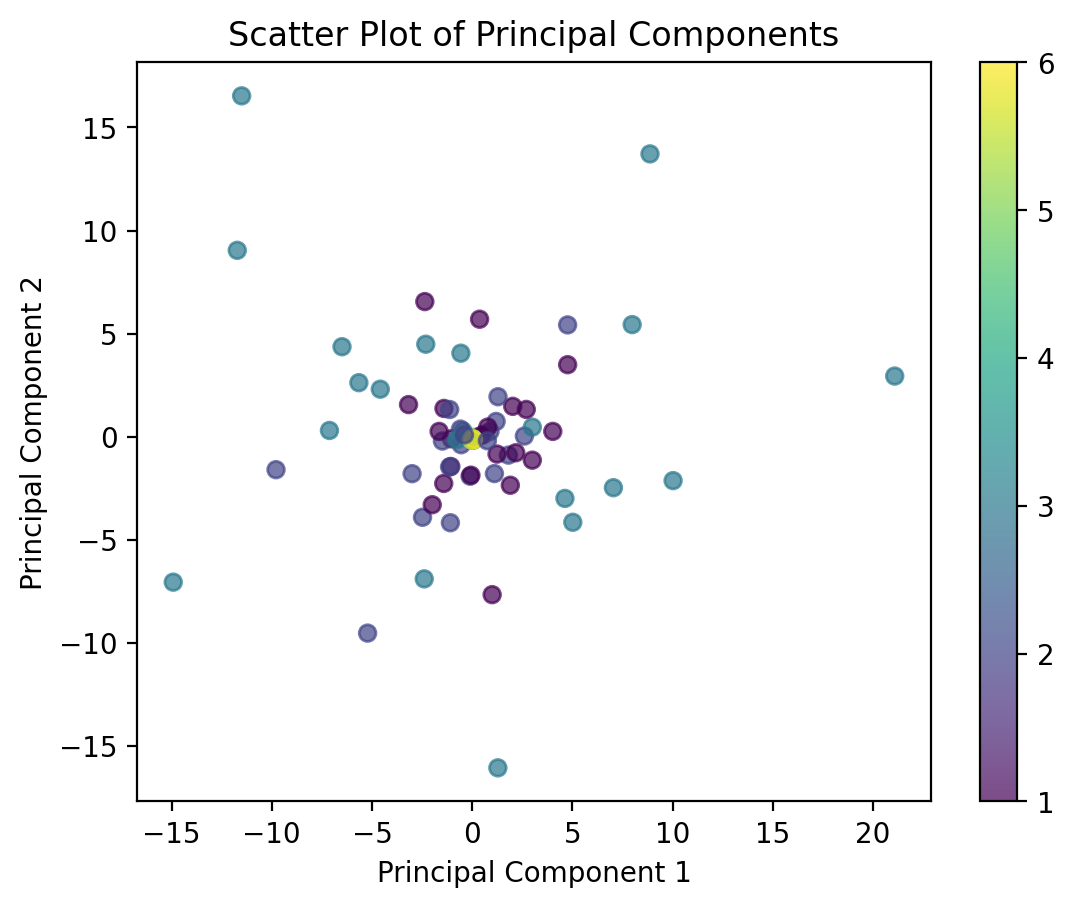

Classes: [(1, 'WALKING'), (2, 'WALKING_UPSTAIRS'), (3, 'WALKING_DOWNSTAIRS'), (4, 'SITTING'), (5, 'STANDING'), (6, 'LAYING')]


In [13]:
# Applying PCA on the dataframe on total acceleration.
df["totalacc"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2

pca = PCA(n_components=2)
xpca = pca.fit_transform(df["totalacc"].values.reshape(-1,500))
print(xpca.shape)

scatter = plt.scatter(xpca[:, 0],xpca[:, 1],c=y_train,cmap='viridis',alpha=0.7)
# print(xpca.size)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.colorbar(scatter)
plt.show()
print("Classes:",list(ACTIVITIES.items()))

- Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

(126, 468) ->  (126, 2) by PCA


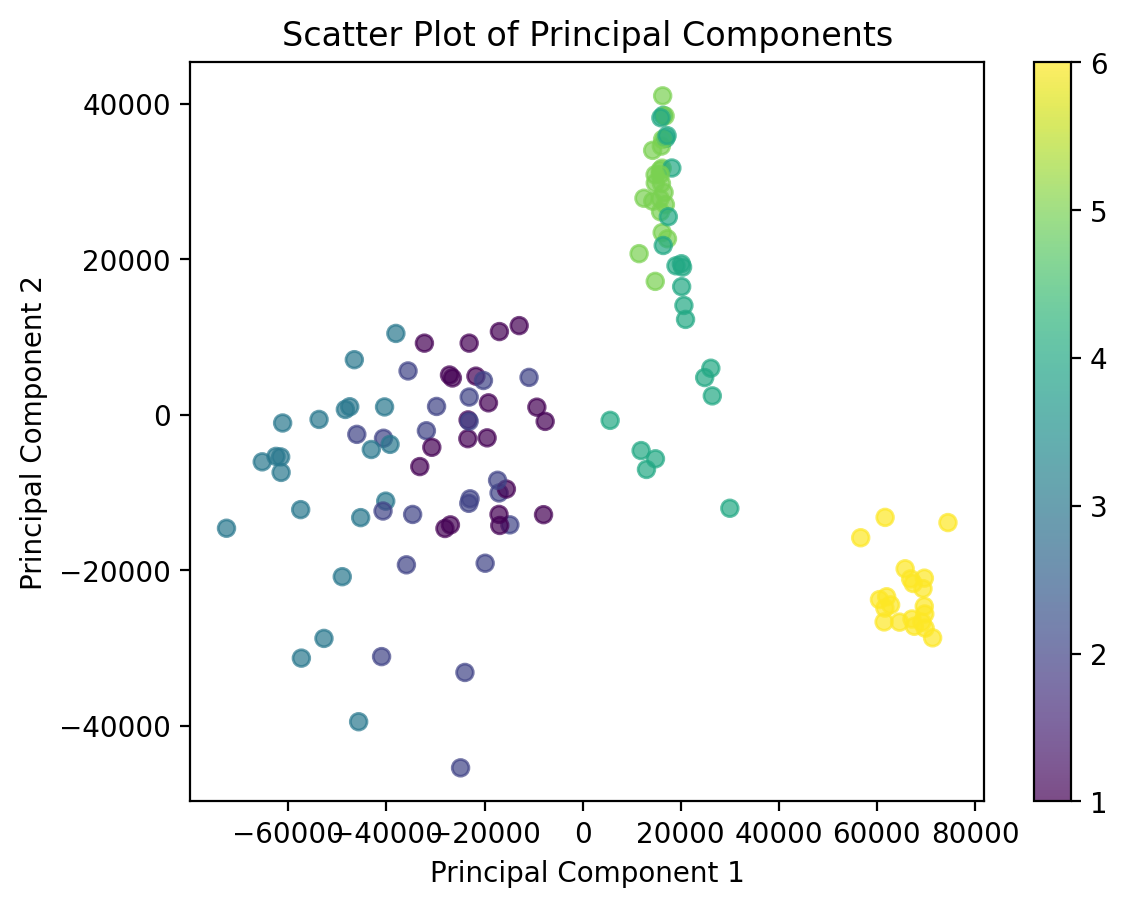

Classes: [(1, 'WALKING'), (2, 'WALKING_UPSTAIRS'), (3, 'WALKING_DOWNSTAIRS'), (4, 'SITTING'), (5, 'STANDING'), (6, 'LAYING')]


In [15]:
# Applying PCA on features obtained by TSFEL featurizer library.
import tsfel

cfg = tsfel.get_features_by_domain()
features = tsfel.time_series_features_extractor(cfg,df[["accx","accy","accz"]], fs=50, window_size=500)

xpcatsfel = pca.fit_transform(features)
scattertsfel = plt.scatter(xpcatsfel[:, 0],xpcatsfel[:, 1],c=y_train,cmap='viridis',alpha=0.7)
print(features.shape, "-> ", xpcatsfel.shape, "by PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.colorbar(scattertsfel)
plt.show()
print("Classes:",list(ACTIVITIES.items()))

TSFEL is better than PCA on total acceleration. The different activities are well classified in TSFEL as we can observe while in PCA on total acceleration, we can see kind of random plotting of points with presence of multiple outlier points.

- Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

(7352, 561) ->  (7352, 2) by PCA


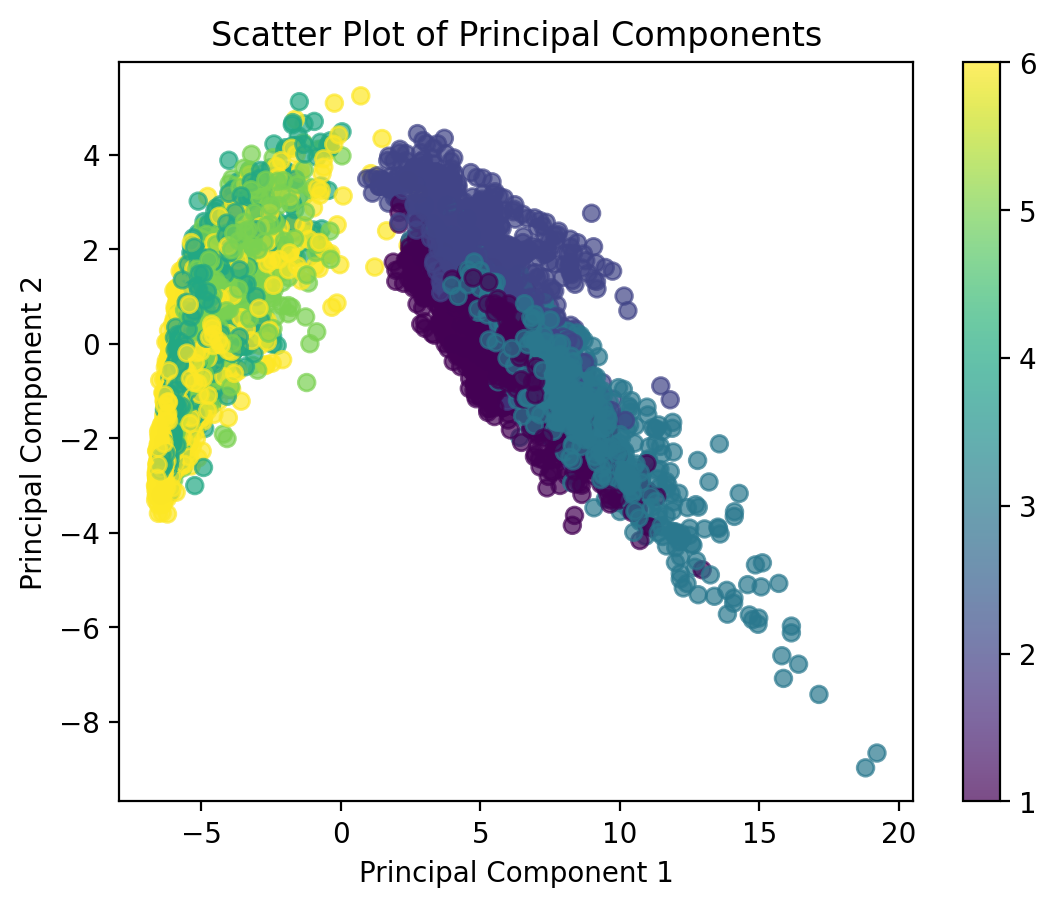

Classes: [(1, 'WALKING'), (2, 'WALKING_UPSTAIRS'), (3, 'WALKING_DOWNSTAIRS'), (4, 'SITTING'), (5, 'STANDING'), (6, 'LAYING')]


In [16]:
# Applying PCA on raw data from provided dataset obtained from 561 feature vector's data.
xpcaraw = pca.fit_transform(x)
scatteraw = plt.scatter(xpcaraw[:, 0],xpcaraw[:, 1],c=yg, cmap='viridis', alpha=0.7)
print(x.shape, "-> ", xpcaraw.shape, "by PCA")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.colorbar(scatteraw)
plt.show()
print("Classes:",list(ACTIVITIES.items()))

##### Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

- We think the `PCA on Raw featurized data` provided by the author of the UCI-HAR dataset is the best method to visualise the data.

### 4. Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features? [1 marks]

In [17]:
corr_mat = features.corr()

corrd = pd.DataFrame(corr_mat)
condition_hc = corrd > 0.999

for column in corrd.columns:
    in_hc = corrd.index[condition_hc[column]]  # Get columns where condition_hc is True
    for index in in_hc:
        print(f"Feature 1: {column}, Feature 2: {index}")   

Feature 1: accx_Absolute energy, Feature 2: accx_Absolute energy
Feature 1: accx_Absolute energy, Feature 2: accx_Average power
Feature 1: accx_Area under the curve, Feature 2: accx_Area under the curve
Feature 1: accx_Autocorrelation, Feature 2: accx_Autocorrelation
Feature 1: accx_Average power, Feature 2: accx_Absolute energy
Feature 1: accx_Average power, Feature 2: accx_Average power
Feature 1: accx_Centroid, Feature 2: accx_Centroid
Feature 1: accx_ECDF Percentile_0, Feature 2: accx_ECDF Percentile_0
Feature 1: accx_ECDF Percentile_1, Feature 2: accx_ECDF Percentile_1
Feature 1: accx_Entropy, Feature 2: accx_Entropy
Feature 1: accx_Fundamental frequency, Feature 2: accx_Fundamental frequency
Feature 1: accx_Histogram mode, Feature 2: accx_Histogram mode
Feature 1: accx_Human range energy, Feature 2: accx_Human range energy
Feature 1: accx_Interquartile range, Feature 2: accx_Interquartile range
Feature 1: accx_Kurtosis, Feature 2: accx_Kurtosis
Feature 1: accx_LPCC_0, Feature 2: 

In [18]:
# Finding correlation matrix for TSFEL data.
corrtsfel = features.corr()
# print(corrtsfel)

corrdf = pd.DataFrame(corrtsfel)
corrdf

,accx_Absolute energy,accx_Area under the curve,accx_Autocorrelation,accx_Average power,accx_Centroid,accx_ECDF Percentile Count_0,accx_ECDF Percentile Count_1,accx_ECDF Percentile_0,accx_ECDF Percentile_1,accx_ECDF_0,...,accz_Wavelet variance_1.39Hz,accz_Wavelet variance_1.56Hz,accz_Wavelet variance_1.79Hz,accz_Wavelet variance_12.5Hz,accz_Wavelet variance_2.08Hz,accz_Wavelet variance_2.5Hz,accz_Wavelet variance_3.12Hz,accz_Wavelet variance_4.17Hz,accz_Wavelet variance_6.25Hz,accz_Zero crossing rate
accx_Absolute energy,1.000000,0.982293,-0.265505,1.000000,0.148917,NaN,NaN,0.870860,0.973972,NaN,...,0.187954,0.215708,0.235808,0.351447,0.251283,0.266530,0.284757,0.307521,0.326068,0.459078
accx_Area under the curve,0.982293,1.000000,-0.209781,0.982293,0.163368,NaN,NaN,0.927716,0.950975,NaN,...,0.168822,0.194849,0.212239,0.278346,0.223537,0.232424,0.241538,0.253931,0.265340,0.355494
accx_Autocorrelation,-0.265505,-0.209781,1.000000,-0.265505,-0.222193,NaN,NaN,-0.187036,-0.256723,NaN,...,-0.159745,-0.174345,-0.182979,-0.201016,-0.188001,-0.191676,-0.194450,-0.197082,-0.196402,-0.219163
accx_Average power,1.000000,0.982293,-0.265505,1.000000,0.148917,NaN,NaN,0.870860,0.973972,NaN,...,0.187954,0.215708,0.235808,0.351447,0.251283,0.266530,0.284757,0.307521,0.326068,0.459078
accx_Centroid,0.148917,0.163368,-0.222193,0.148917,1.000000,NaN,NaN,0.132561,0.133066,NaN,...,0.074785,0.075489,0.074512,0.063763,0.073090,0.071837,0.069411,0.064623,0.060643,0.057612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
accz_Wavelet variance_2.5Hz,0.266530,0.232424,-0.191676,0.266530,0.071837,NaN,NaN,0.028159,0.368419,NaN,...,0.844535,0.924560,0.969788,0.716342,0.991801,1.000000,0.984074,0.919284,0.799837,0.260191
accz_Wavelet variance_3.12Hz,0.284757,0.241538,-0.194450,0.284757,0.069411,NaN,NaN,0.029745,0.383060,NaN,...,0.777649,0.864975,0.919993,0.774577,0.955278,0.984074,1.000000,0.970811,0.864808,0.314778
accz_Wavelet variance_4.17Hz,0.307521,0.253931,-0.197082,0.307521,0.064623,NaN,NaN,0.038158,0.399400,NaN,...,0.674786,0.764837,0.826125,0.858174,0.871792,0.919284,0.970811,1.000000,0.947537,0.406976
accz_Wavelet variance_6.25Hz,0.326068,0.265340,-0.196402,0.326068,0.060643,NaN,NaN,0.057394,0.408403,NaN,...,0.541788,0.634076,0.699422,0.952268,0.748665,0.799837,0.864808,0.947537,1.000000,0.510359


In [19]:
corraw = pd.DataFrame(x.corr())
corraw

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.148061,-0.256952,0.000619,-0.021903,-0.044617,0.006290,-0.022754,-0.047558,0.044062,...,0.030681,-0.017557,-0.015613,-0.544320,0.012173,0.037444,0.028844,-0.035257,0.034371,0.028242
tBodyAcc-mean()-Y,0.148061,1.000000,-0.078769,-0.045160,-0.044920,-0.049746,-0.044180,-0.045049,-0.050402,-0.038108,...,-0.022395,-0.001587,-0.004459,0.070559,-0.013541,0.017967,0.075679,-0.005309,0.001053,-0.013903
tBodyAcc-mean()-Z,-0.256952,-0.078769,1.000000,-0.020217,-0.016641,-0.008410,-0.018747,-0.015203,-0.001988,-0.037197,...,-0.020481,0.020091,0.019127,0.052841,-0.039836,-0.063609,-0.034037,0.008587,-0.015288,-0.022643
tBodyAcc-std()-X,0.000619,-0.045160,-0.020217,1.000000,0.927461,0.851668,0.998632,0.920888,0.846392,0.980844,...,-0.065987,0.148034,0.115565,-0.035011,-0.021633,0.018985,-0.024810,-0.371653,0.471065,0.394825
tBodyAcc-std()-Y,-0.021903,-0.044920,-0.016641,0.927461,1.000000,0.895510,0.922803,0.997347,0.894509,0.917366,...,-0.105621,0.206227,0.176946,-0.020379,-0.012505,-0.008507,-0.014592,-0.380531,0.523600,0.433169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.037444,0.017967,-0.063609,0.018985,-0.008507,-0.018429,0.019389,-0.012546,-0.023525,0.025066,...,-0.026615,0.034514,0.024553,-0.006269,0.009141,1.000000,-0.116001,-0.005853,-0.012313,-0.019903
"angle(tBodyGyroJerkMean,gravityMean)",0.028844,0.075679,-0.034037,-0.024810,-0.014592,-0.006471,-0.024951,-0.012341,-0.007231,-0.028871,...,0.000102,-0.017937,-0.014865,-0.020823,0.035263,-0.116001,1.000000,0.023995,-0.005869,-0.005656
"angle(X,gravityMean)",-0.035257,-0.005309,0.008587,-0.371653,-0.380531,-0.345011,-0.368191,-0.377025,-0.347389,-0.384192,...,0.087332,-0.086006,-0.079751,0.011880,0.023246,-0.005853,0.023995,1.000000,-0.783848,-0.643655
"angle(Y,gravityMean)",0.034371,0.001053,-0.015288,0.471065,0.523600,0.476006,0.466424,0.525081,0.477607,0.480229,...,-0.100125,0.086993,0.078079,0.001540,-0.012990,-0.012313,-0.005869,-0.783848,1.000000,0.594885


## **Task 2 : Decision Trees for Human Activity Recognition [3 marks]**

### 1. Use Sklearn Library to train Decision Tress. [1.5 marks]

My Approach in this question will be such that I will train the dataset using the diffrent methods illustrated in the question for diffrent depths ranging from depth 2 uptill depth 15, and display the results as demnaded for the depth which has the best accuracy.

- Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.

In [412]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Flatten train & test data automatically
X_train_flat = X_train.reshape(-1,1500)
X_test_flat  = X_test.reshape(-1,1500)

best_acc, best_prec, best_rec, best_depth, best_pred = 0, 0, 0, 0, None

# Try different depths
for depth in range(2, 15):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=2)
    clf.fit(X_train_flat, y_train)
    y_pred = clf.predict(X_test_flat)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro')

    if acc > best_acc:
        best_acc, best_prec, best_rec, best_depth, best_pred = acc, prec, rec, depth, y_pred

y_pred_raw = best_pred

print(f"Best Accuracy: {best_acc*100:.2f}% at depth {best_depth}")
print(f"Precision: {best_prec:.4f}")
print(f"Recall: {best_rec:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, best_pred))


Best Accuracy: 64.81% at depth 6
Precision: 0.6108
Recall: 0.6481
Confusion Matrix:
 [[2 3 1 3 0 0]
 [1 6 1 0 1 0]
 [5 2 1 1 0 0]
 [0 0 0 9 0 0]
 [0 1 0 0 8 0]
 [0 0 0 0 0 9]]


- Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

In [413]:
tf = pd.DataFrame(
    np.concatenate(
        (X_test.reshape((-1, 3)), np.repeat(y_test, 500).reshape(-1, 1)),
        axis=1
    ),
    columns=["accx", "accy", "accz", "Label"]
)

features_test = tsfel.time_series_features_extractor(
    cfg, tf[["accx", "accy", "accz"]], fs=50, window_size=500
)

best_acc, best_prec, best_rec, best_depth, best_pred = 0, 0, 0, 0, None

for depth in range(2, 15):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=2)
    clf.fit(features, y_train)
    y_pred = clf.predict(features_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro')

    if acc > best_acc:
        best_acc, best_prec, best_rec, best_depth, best_pred = acc, prec, rec, depth, y_pred

y_pred_tsfel = best_pred

print(f"Best Accuracy: {best_acc*100:.2f}% at depth {best_depth}")
print(f"Precision: {best_prec:.4f}")
print(f"Recall: {best_rec:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, best_pred))

Best Accuracy: 85.19% at depth 5
Precision: 0.8587
Recall: 0.8519
Confusion Matrix:
 [[7 1 1 0 0 0]
 [1 8 0 0 0 0]
 [0 2 7 0 0 0]
 [0 0 0 8 1 0]
 [0 0 0 2 7 0]
 [0 0 0 0 0 9]]


- Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model

In [414]:
best_acc, best_prec, best_rec, best_depth, best_pred = 0, 0, 0, 0, None

for depth in range(2, 15):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=2)
    clf.fit(x, yg)
    y_pred = clf.predict(xtest)

    acc = accuracy_score(ytest, y_pred)
    prec = precision_score(ytest, y_pred, average='macro', zero_division=0)
    rec = recall_score(ytest, y_pred, average='macro')

    if acc > best_acc:
        best_acc, best_prec, best_rec, best_depth, best_pred = acc, prec, rec, depth, y_pred

y_pred_custom = best_pred

print(f"Best Accuracy: {best_acc*100:.2f}% at depth {best_depth}")
print(f"Precision: {best_prec:.4f}")
print(f"Recall: {best_rec:.4f}")
print("Confusion Matrix:\n", confusion_matrix(ytest, best_pred))

Best Accuracy: 87.55% at depth 9
Precision: 0.8767
Recall: 0.8717
Confusion Matrix:
 [[472   6  18   0   0   0]
 [ 63 376  32   0   0   0]
 [ 24  46 350   0   0   0]
 [  0   0   0 372 119   0]
 [  0   0   0  59 473   0]
 [  0   0   0   0   0 537]]



### 2. Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree. [1 marks]

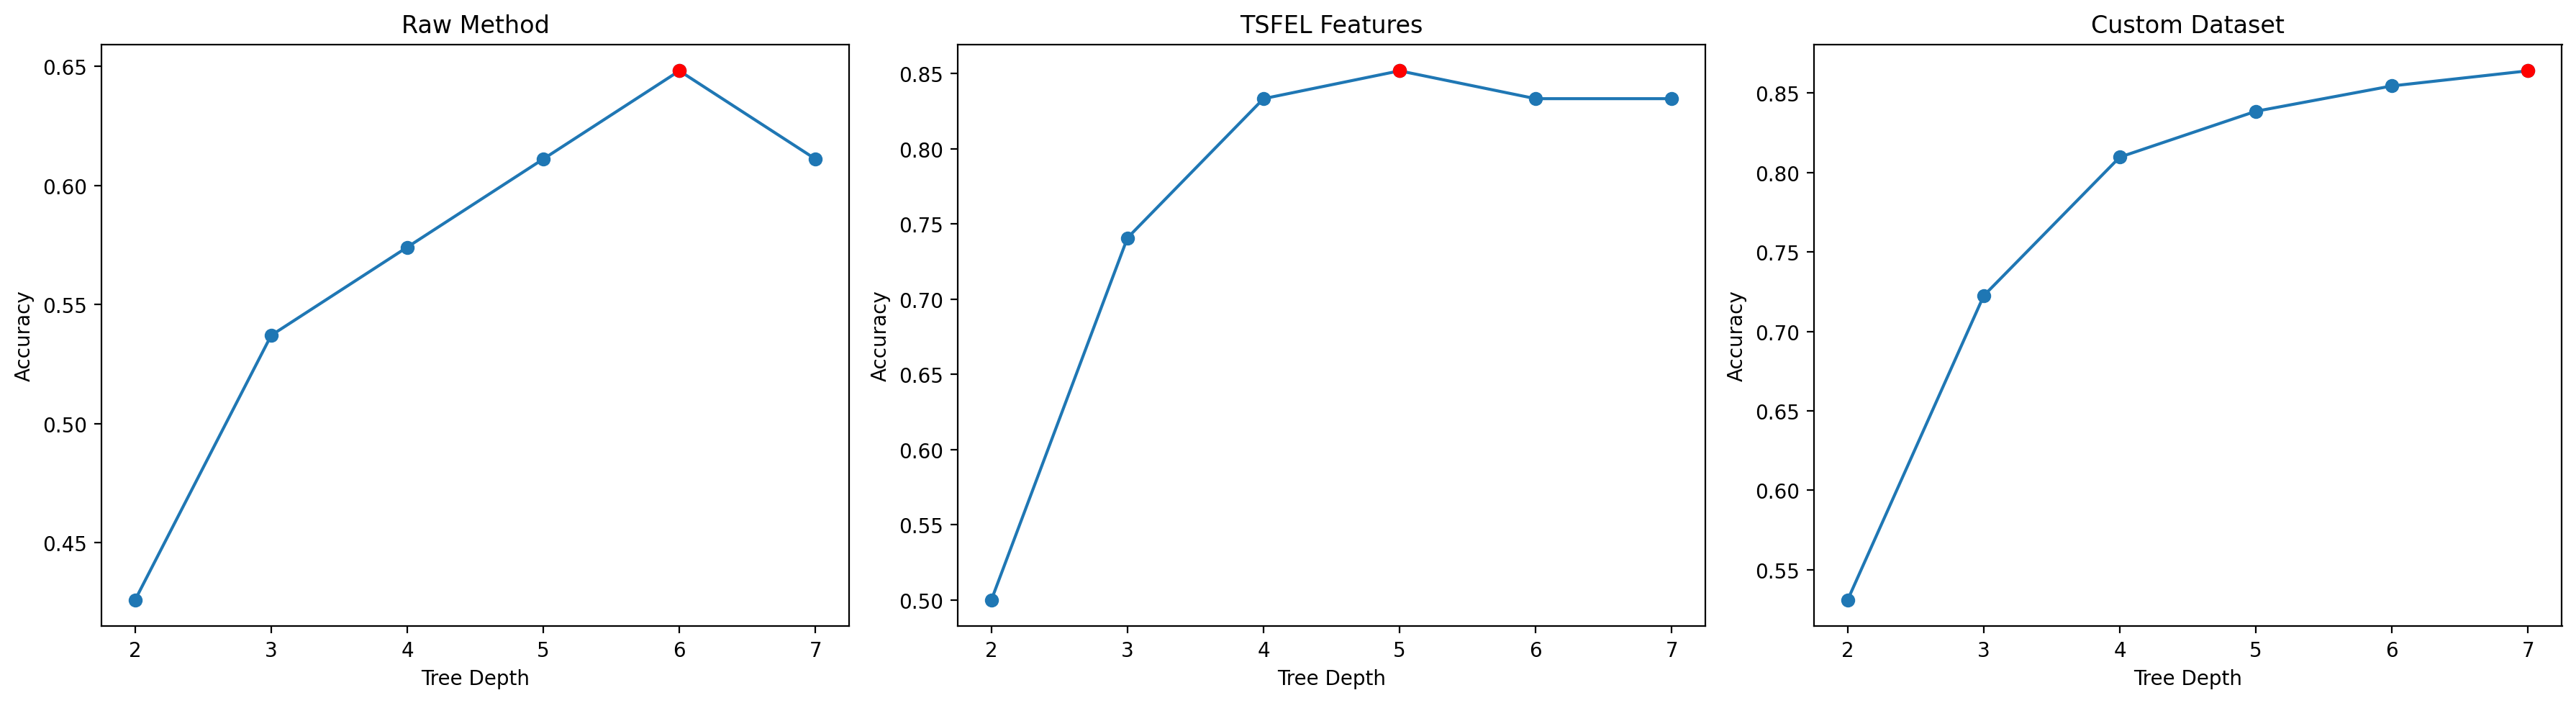

In [415]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# ----------------------------
# 1. Raw reshaped
# ----------------------------
acc1 = []
best_acc1, best_depth1 = 0, 0
for depth in range(2, 8):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=2)
    clf.fit(X_train.reshape(-1, 1500), y_train)
    y_pred = clf.predict(X_test.reshape(-1, 1500))
    acc = accuracy_score(y_test, y_pred)
    acc1.append(acc)
    if acc > best_acc1:
        best_acc1, best_depth1 = acc, depth

# ----------------------------
# 2. TSFEL features
# ----------------------------
acc2 = []
best_acc2, best_depth2 = 0, 0
for depth in range(2, 8):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=2)
    clf.fit(features, y_train)
    y_pred = clf.predict(features_test)
    acc = accuracy_score(y_test, y_pred)
    acc2.append(acc)
    if acc > best_acc2:
        best_acc2, best_depth2 = acc, depth

# ----------------------------
# 3. Custom dataset (x, yg, xtest, ytest)
# ----------------------------
acc3 = []
best_acc3, best_depth3 = 0, 0
for depth in range(2, 8):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=2)
    clf.fit(x, yg)
    y_pred = clf.predict(xtest)
    acc = accuracy_score(ytest, y_pred)
    acc3.append(acc)
    if acc > best_acc3:
        best_acc3, best_depth3 = acc, depth

# ----------------------------
# Plotting
# ----------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Raw signals
axes[0].plot(range(2, 8), acc1, marker="o")
axes[0].scatter(best_depth1, best_acc1, color="red", zorder=5)
axes[0].set_title("Raw Method")
axes[0].set_xlabel("Tree Depth")
axes[0].set_ylabel("Accuracy")

# TSFEL
axes[1].plot(range(2, 8), acc2, marker="o")
axes[1].scatter(best_depth2, best_acc2, color="red", zorder=5)
axes[1].set_title("TSFEL Features")
axes[1].set_xlabel("Tree Depth")
axes[1].set_ylabel("Accuracy")

# Custom dataset
axes[2].plot(range(2, 8), acc3, marker="o")
axes[2].scatter(best_depth3, best_acc3, color="red", zorder=5)
axes[2].set_title("Custom Dataset")
axes[2].set_xlabel("Tree Depth")
axes[2].set_ylabel("Accuracy")

plt.tight_layout()
plt.show()


### 3. Are there any participants/ activitivies where the Model performace is bad? If Yes, Why? [0.5 mark]

In [416]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def analyze_performance(y_true, y_pred, activity_names):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=activity_names, yticklabels=activity_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    return ''

activity_names = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

Confusion matrix for Raw Data


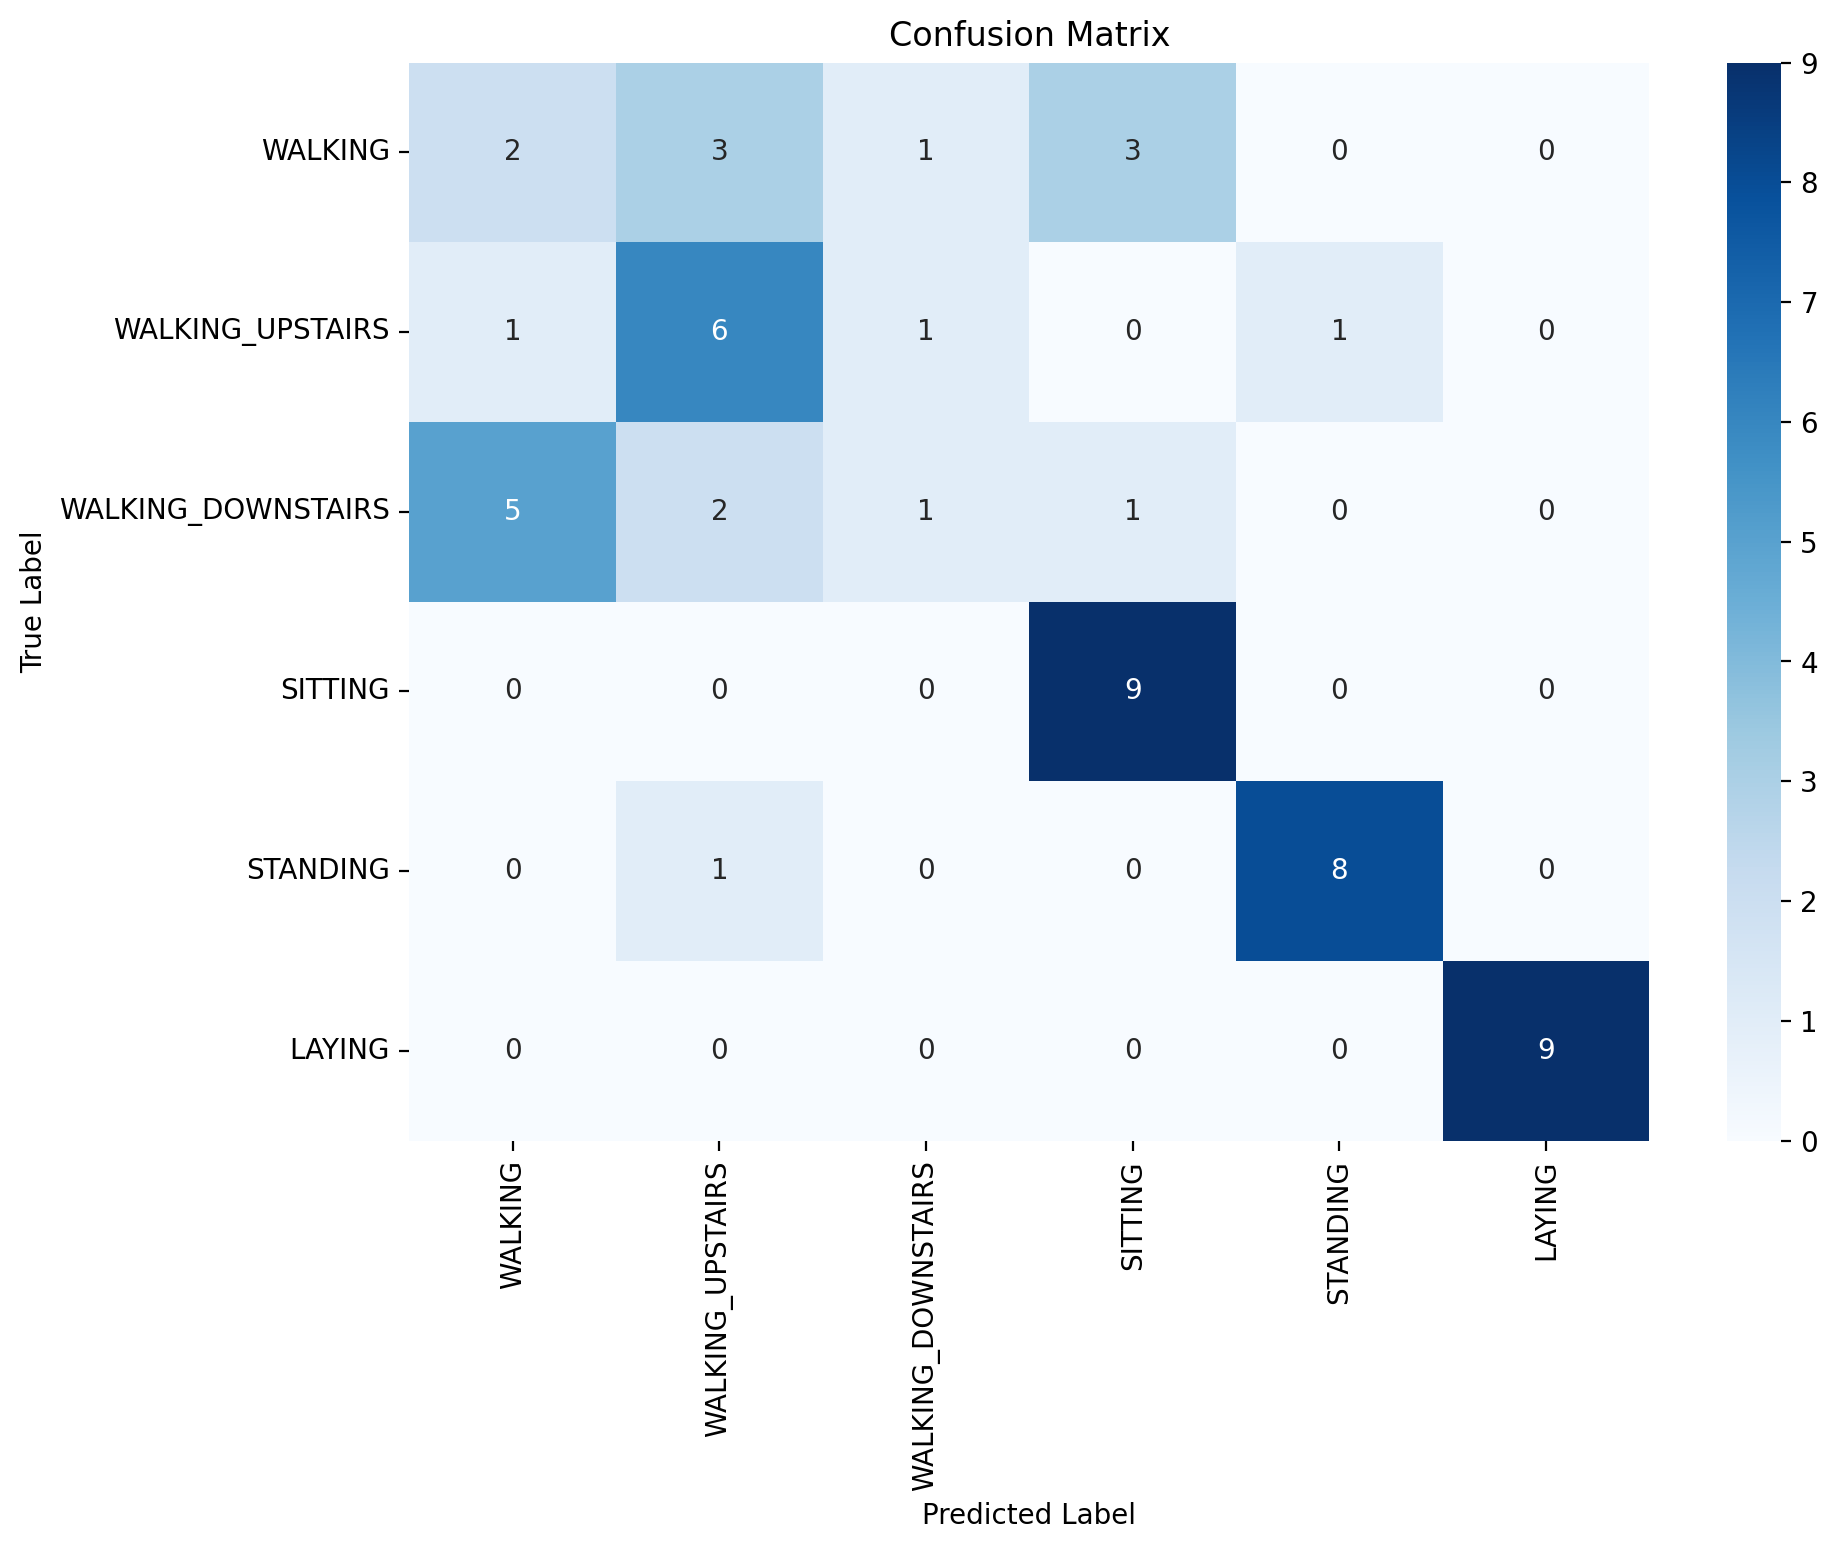

The model struggles to differentiate between walking and walking downstairs, and its predictions for walking are often inaccurate.



In [417]:
print("Confusion matrix for Raw Data")
report_raw = analyze_performance(y_test, y_pred_raw, activity_names)
print('The model struggles to differentiate between walking and walking downstairs, and its predictions for walking are often inaccurate.')

print(report_raw)

Confusion matrix for TSFEL Data


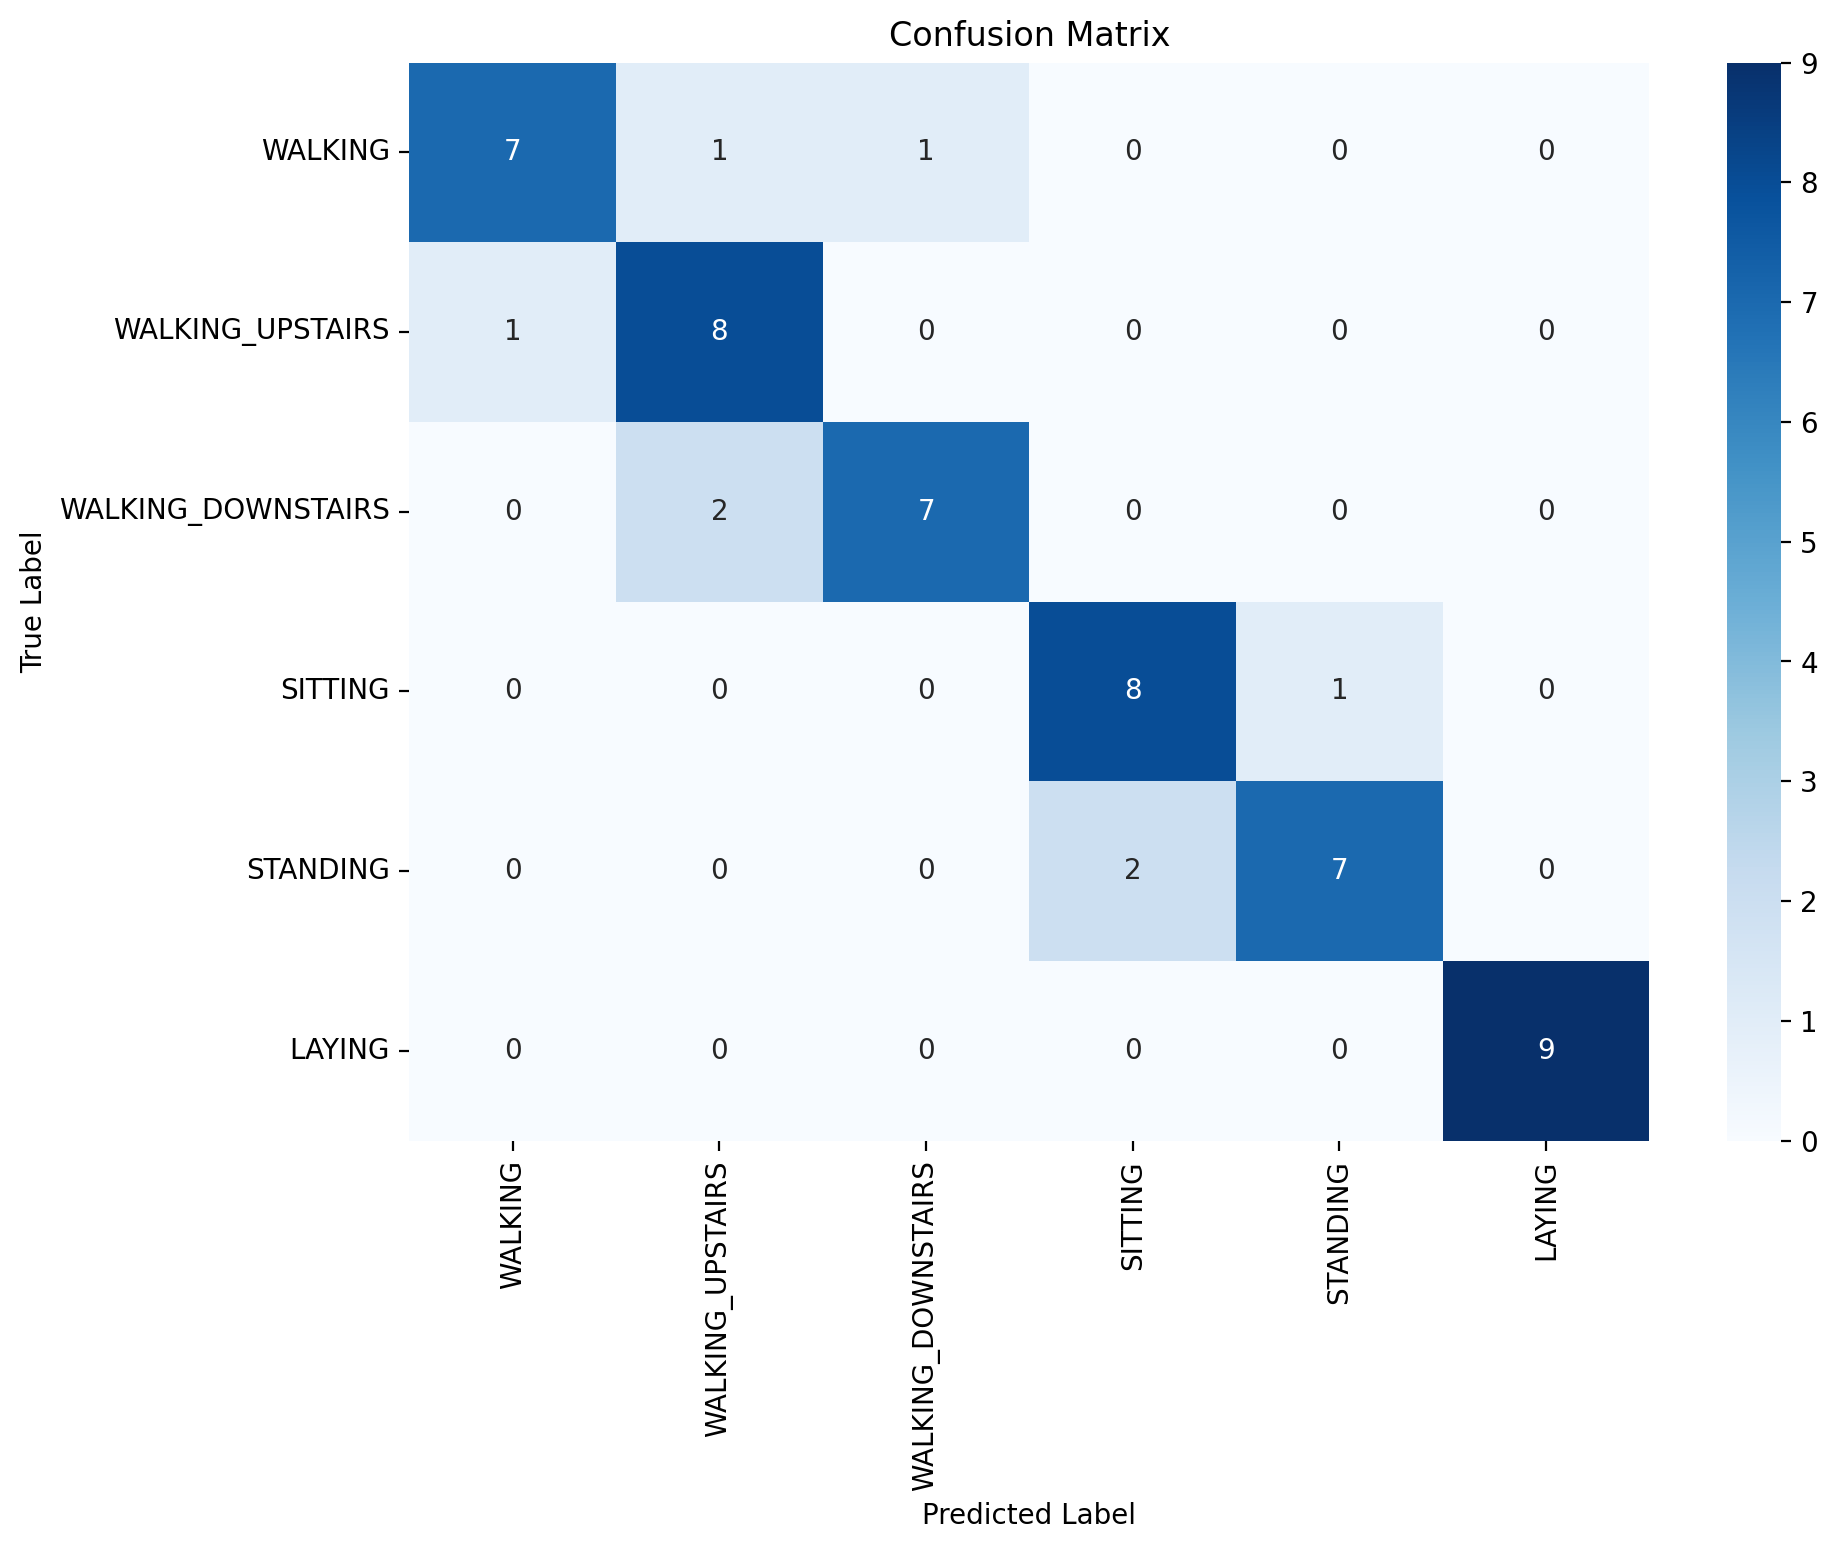

The model demonstrates reasonably good accuracy in separating most of the activities.



In [418]:
print("Confusion matrix for TSFEL Data")
report_raw = analyze_performance(y_test, y_pred_tsfel, activity_names)
print('The model demonstrates reasonably good accuracy in separating most of the activities.')

print(report_raw)

Confusion matrix for Accelerometer Data


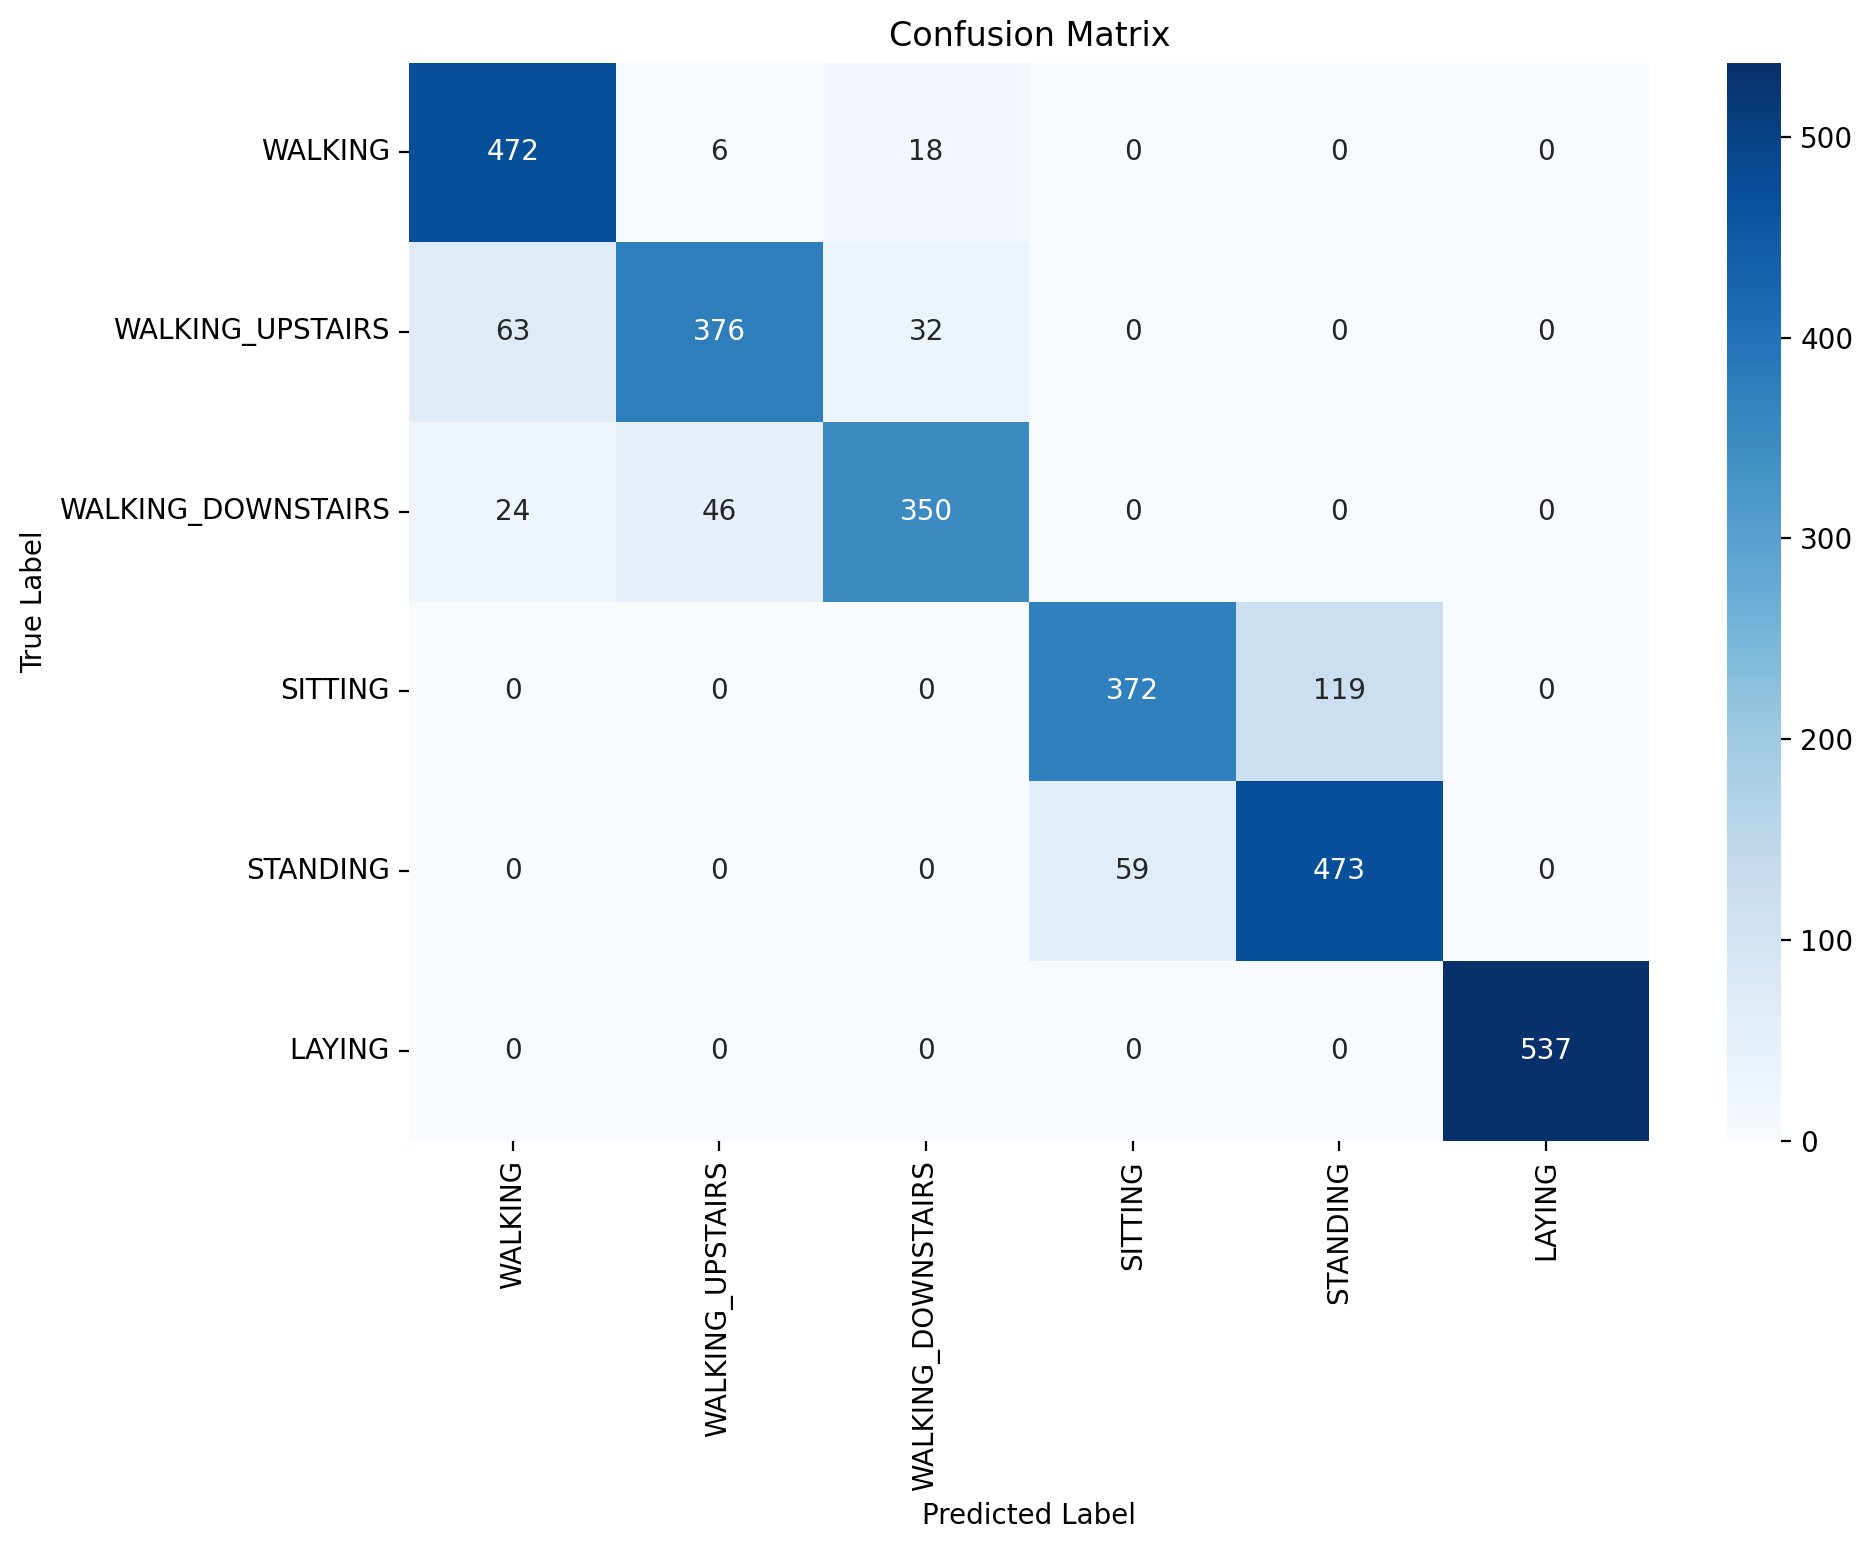

The model finds it difficult to correctly distinguish sitting from standing and also performs poorly in identifying walking upstairs.



In [419]:
print("Confusion matrix for Accelerometer Data")
report_raw = analyze_performance(ytest, y_pred_custom, activity_names)
print('The model finds it difficult to correctly distinguish sitting from standing and also performs poorly in identifying walking upstairs.')

print(report_raw)

## **Task 3 : Data Collection in the Wild [2 marks]**

Raw Data - Downsampling

In [ ]:
# # Downsampling to 50Hz
# folder_path = os.path.join("Task-3 Data", "Raw")
# for filename in os.listdir(folder_path):
#         if filename.endswith(".csv"):  # only process CSV files
#             file_path = os.path.join(folder_path, filename)
#             df = pd.read_csv(file_path, encoding="latin1")
#             file_path = os.path.join(folder_path, filename)
#             df = pd.read_csv(file_path, encoding='latin1')
#             # print(file_path)
#             # print(df.columns.tolist())
#             df['time'] = pd.to_timedelta(df['time'], unit='s')
#             df = df.set_index('time')

#             df_resampled = df.resample('20ms').mean().interpolate()  # 20ms interval for 50Hz

#             df_resampled = df_resampled.drop(columns = [ 'TgF'])
#             df_resampled = df_resampled.reset_index(drop=True)
#             df_resampled.to_csv(file_path, index=False)
# # Never run this code again. It is just for converting the data to appropriate format.

Processing the Data into 10s( Edge trimming)

In [38]:
file_path = os.path.join("Task-3 Data", "Raw")
processed_data = os.path.join("Task-3 Data", "Processed")
os.makedirs(processed_data, exist_ok=True)

for filename in os.listdir(file_path):
    if filename.endswith(".csv"):  # only process CSV files
        file_path = os.path.join("Task-3 Data", "Raw", filename)
        df = pd.read_csv(file_path, encoding="latin1")

        if(len(df) >= 500):
            i = (len(df) - 500) // 2
            j = i + 500
            df = df.iloc[i:j]
        else:
            continue
        
        save_path = os.path.join(processed_data, filename)
        df.to_csv(save_path, index=False)

Adding Labels

In [41]:
file_path = os.path.join("Task-3 Data", "Processed")

activity_labels = {
    "walking": 1,
    "walking_up": 2,
    "walking_down": 3,
    "sitting": 4,
    "standing": 5,
    "laying": 6
}

for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)
    if not os.path.isdir(folder_path):
        continue

    activity_key = folder.lower()
    if activity_key not in activity_labels:
        continue    

    label = activity_labels[activity_key]

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".csv"):
            final_path = os.path.join(folder_path, filename)
            df = pd.read_csv(final_path, encoding="latin1")

            df['Label'] = label
            df.to_csv(final_path, index=False)

Adding Person Labels

In [42]:
file_path = os.path.join("Task-3 Data", "Processed")

activity_labels = {
    "walking": 1,
    "walking_up": 2,
    "walking_down": 3,
    "sitting": 4,
    "standing": 5,
    "laying": 6
}

person_labels = {
    "arin": 1,
    "shiv": 2,
    "kshitij": 3
}

for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)
    if not os.path.isdir(folder_path):
        continue

    activity_key = folder.lower()
    if activity_key not in activity_labels:
        continue    

    label = activity_labels[activity_key]

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".csv"):
            final_path = os.path.join(folder_path, filename)
            df = pd.read_csv(final_path, encoding="latin1")

            person_key = filename.lower()
            person_id = None
            for name, pid in person_labels.items():
                if name in person_key:
                    person_id = pid
                    break

            if person_id is None:
                continue

            df.insert(0, 'Person', person_id)
            df['Label'] = label
            df = df[[col for col in df.columns if col != 'Label'] + ['Label']]
            df.to_csv(final_path, index=False)

Combining the Data

In [44]:
file_path = os.path.join("Task-3 Data", "Processed")

activity_order = ["walking", "walking_up", "walking_down", "sitting", "standing", "laying"]
person_order = ["arin", "shiv", "kshitij"]

final_data = []

for person_name in person_order:
    person_data = []

    for activity_name in activity_order:
        folder_path = os.path.join(file_path, activity_name)
        if not os.path.isdir(folder_path):
            continue

        for filename in os.listdir(folder_path):
            if filename.lower().startswith(person_name) and filename.lower().endswith(".csv"):
                file_csv = os.path.join(folder_path, filename)
                df = pd.read_csv(file_csv, encoding="latin1")
                person_data.append(df)

    if person_data:
        final_data.append(pd.concat(person_data, ignore_index=True))

final_dataset = pd.concat(final_data, ignore_index=True)

output_path = os.path.join(file_path, "combined.csv")
final_dataset.to_csv(output_path, index=False)

In [8]:
import tsfel

df = pd.DataFrame(np.concatenate((X_train.reshape((-1, 3)), np.repeat(y_train, 500).reshape(-1,1)), axis = 1), columns = ["accx", "accy", "accz", "Label"])
df["totalacc"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2
cfg = tsfel.get_features_by_domain()
features = tsfel.time_series_features_extractor(cfg,df[["accx","accy","accz"]], fs=50, window_size=500)


### 1. Use the Decision Tree model trained on the UCI-HAR dataset to predict the activities that you performed. Report the accuracy, precision, recall and confusion matrix of the model. You have three version of UCI dataset you can use a)Raw data from accelerometer, b)TSFEL featurised data, c)Features provided by author. Choose which version to use, ensuring that your test data is similar to your training data. How did the model perform? [1 marks]

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

file_path = os.path.join("Task-3 Data", "Processed", "combined.csv")
d = pd.read_csv(file_path)
acc = d[['gFx','gFy','gFz']]
dtest = d["Label"]
X_train_reshaped = X_train.reshape(-1,1500)
acc = acc.to_numpy()
acc_reshaped = acc.reshape(18,1500)
clf = DecisionTreeClassifier(random_state=2,max_depth=6)
clf.fit(X_train_reshaped, y_train)
dpred = clf.predict(acc_reshaped)
print(f"Accuracy of author's raw data trained decision tree on our data is {accuracy_score(dtest[::500], dpred)*100:.2f}%")

Accuracy of author's raw data trained decision tree on our data is 27.78%


In [109]:
d = d.rename(columns={"gFx": "accx", "gFy": "accy", "gFz": "accz"})
clf = DecisionTreeClassifier(random_state=2,max_depth=8)

clf.fit(features, y_train)
# print(d.columns)
d.columns = ['Person','accx','accy','accz','Label']
dtsfel = tsfel.time_series_features_extractor(cfg,d[["accx","accy","accz"]], fs=50, window_size=500)
dpred = clf.predict(dtsfel)
print(f"Accuracy of TSFEL trained decision tree on our data is {accuracy_score(dtest[::500],dpred)*100:.2f}%")

Accuracy of TSFEL trained decision tree on our data is 27.78%


> We cant use author's featurized data as we dont have the same features of data from our recordings.

| Method | Accuracy | 
| --- | --- |
| Raw Data | 27.78% |
| TSFEL | 27.78% | 

### 2. Use the data you collected to predict the activities that you performed. Decide whether to apply preprocessing and featurization, and if so, choose the appropriate methods. How did the model perform? [1 marks]

`own data to train and test`

In [88]:
# raw data first
X_train,x_test,y_train,y_test = train_test_split(acc,dtest,test_size=0.3)
clf = DecisionTreeClassifier(random_state=2,max_depth=8)
clf.fit(X_train,y_train)
dpred = clf.predict(x_test)
print(f"Accuracy of the model trained and tested on our raw data is {accuracy_score(y_test,dpred)*100:.2f}%")

Accuracy of the model trained and tested on our raw data is 74.70%


To reduce bias in the training data, a better approach will be to train the model with 2 person's data and test it on 3rd person's data

> Now applying `featurization` using **tsfel**

In [29]:
cfg = tsfel.get_features_by_domain()
acctsfel = tsfel.time_series_features_extractor(cfg,acc,fs=50,window_size=500)

In [30]:
xtr,xt,ytr,yt = train_test_split(acctsfel,dtest[::500],test_size=0.3)
clf = DecisionTreeClassifier(random_state=42,max_depth=8)
clf.fit(xtr,ytr)
ypr = clf.predict(xt)
print(f"Accuracy of the model trained and tested on our raw data is {accuracy_score(yt,ypr)*100:.2f}%")

Accuracy of the model trained and tested on our raw data is 50.00%


Accuracy fell after featurizing the data using tsfel
| Method | Accuracy | 
| --- | --- |
| Raw Data | 74.70% |
| TSFEL | 50% | 